# Алгоритмы анализа данных
## Урок 2. Масштабирование признаков. L1- и L2-регуляризация. Стохастический градиентный спуск

In [61]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(suppress=True)

К признаку стажа добавим признаки: средняя стоимость занятия, квалификация репетитора

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])
X

array([[   1,    1,    1,    1,    1,    1,    1,    1,    1,    1],
       [   1,    1,    2,    1,    3,    0,    5,   10,    1,    2],
       [ 500,  700,  750,  600, 1450,  800, 1500, 2000,  450, 1000],
       [   1,    1,    2,    1,    2,    1,    3,    3,    1,    2]])

In [3]:
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]
y

[45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

**Нормализация [0, 1]**

In [30]:
X_norm = X.copy().astype(np.float64)
for i in range(1, X_norm.shape[0]):
    X_norm[i] = (X_norm[i] - X_norm[i].min()) / (X_norm[i].max() - X_norm[i].min())
X_norm

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.1       , 0.1       , 0.2       , 0.1       , 0.3       ,
        0.        , 0.5       , 1.        , 0.1       , 0.2       ],
       [0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
        0.22580645, 0.67741935, 1.        , 0.        , 0.35483871],
       [0.        , 0.        , 0.5       , 0.        , 0.5       ,
        0.        , 1.        , 1.        , 0.        , 0.5       ]])

**Стандартизация**

In [27]:
X_st = X.copy().astype(np.float64)
for i in range(1, X_norm.shape[0]):
    X_st[i] = (X_st[i] - X_st[i].mean()) / X_st[i].std()
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
        -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

Функция расчета средней квадратичной ошибки

In [33]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

### Задание 1

Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).

**Решение**

In [165]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
    return W

In [174]:
lambdas = [10**x for x in range(-4, 3)]
lambdas

[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

In [175]:
W_by_lambda = [eval_model_reg2(X_st, y, iterations=1000, alpha=1e-2, lambda_=lambda_) for lambda_ in lambdas]
W_by_lambda

[array([57.39713005,  5.765859  ,  1.85689028,  4.03893236]),
 array([57.37131425,  5.75982044,  1.86287557,  4.03701148]),
 array([57.11442777,  5.70075336,  1.92095868,  4.01831082]),
 array([54.66666663,  5.2195531 ,  2.35823112,  3.87056803]),
 array([38.26666667,  3.66557047,  2.94352908,  3.25219166]),
 array([9.56666667, 1.42530532, 1.35226504, 1.37037873]),
 array([1.1254902 , 0.20774643, 0.20104868, 0.2018609 ])]

In [176]:
W_obs = dict()
for i in range(4):
    W_obs[i] = [W_by_lambda[obs][i] for obs in range(len(lambdas))]

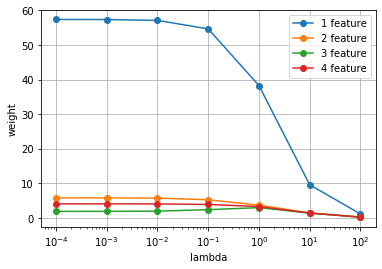

In [181]:
plt.xscale('log')
plt.grid()
for i in range(4):
    plt.plot(lambdas, W_obs[i], 'o-')
plt.xlabel("lambda")
plt.ylabel("weight")
plt.legend([f'{i} feature' for i in range(1, 5)])
plt.show()

### Задание 2

Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

**Решение**

Нет. Нормализация и стандартизация масштабируют и смещают признаки. В случае нормализации они расположены в промежутке [0, 1], а в случае стандартизации медиана признаков находится в 0.

### Задание 3$^{*}$ 

Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

**Решение**

In [57]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * np.sign(W)) 
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [58]:
eval_model_reg1(X_st, y, iterations=500, alpha=1e-2, lambda_=1e-4)

50 [36.67751681  3.2003345   3.49163732  4.39413385] 488.56499800973626
100 [49.85346813  3.66666421  3.48289126  4.46267261] 100.15399586441188
150 [54.65175011  3.93617551  3.32275429  4.38530488] 48.51001691485962
200 [56.39913893  4.16739559  3.16666683  4.31346253] 41.522025065540426
250 [57.03548495  4.37261526  3.02265248  4.25379546] 40.483933253856215
300 [57.26722288  4.55528163  2.89026296  4.20486994] 40.25690199911283
350 [57.35161481  4.71800342  2.76862373  4.16504577] 40.15489487461795
400 [57.38234779  4.8630547   2.65689646  4.1328962 ] 40.08337665284533
450 [57.39353981  4.99243912  2.55430217  4.10720081] 40.02701037112608
500 [57.3976156   5.1079242   2.46011903  4.08691798] 39.981549269279725


array([57.3976156 ,  5.1079242 ,  2.46011903,  4.08691798])